# Chapter 1: Introduction

## An Overview of Statistical Learning
Chapter 1 provides an introduction to the data

### Data sets
The data sets were downloaded from [here](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) and stored in the /data folder

In [76]:
!ls ../data

Advertising.csv  college.csv	 khan_xtrain.csv  portfolio.csv  weekly.csv
auto.csv	 Credit.csv	 khan_ytest.csv   smarket.csv
boston.csv	 default.csv	 khan_ytrain.csv  titanic.csv
caravan.csv	 hitters.csv	 nci60_data.csv   usarrests.csv
carseats.csv	 khan_xtest.csv  nci60_labs.csv   wage.csv


### Wage Data
Let's have a look at the "wage" data and recreate the Figure 1.1

In [77]:
# =======
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn-white')

In [78]:
# =======
# reade data set using pandas
df_wage = pd.read_csv('../data/wage.csv')

# returns the first 10 rows
df_wage.head(10)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
5,2008,54,1. Male,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.115744
6,2009,44,1. Male,2. Married,4. Other,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.133021,169.528538
7,2008,30,1. Male,1. Never Married,3. Asian,3. Some College,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.716003,111.720849
8,2006,41,1. Male,1. Never Married,2. Black,3. Some College,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.778151,118.884359
9,2004,52,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.857332,128.680488


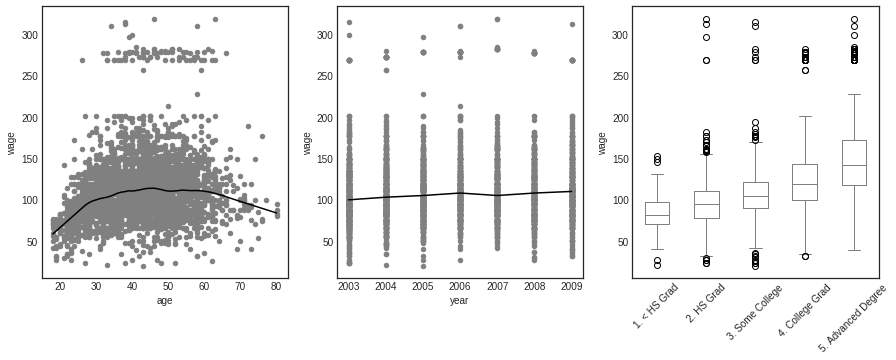

In [79]:
# =======
# plot relationship between wage and age, year and education: Figure 1.1
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# age vs wage
df_wage.plot.scatter('age', 'wage', color="gray", ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1], color='black')

# year vs wage
df_wage.plot.scatter('year', 'wage', color="gray", ax=ax[1])
ax[1].plot(df_wage.groupby('year')['wage'].median(), color='black')

# education vs wage
df_wage.pivot(columns='education', values='wage').plot.box(color="gray", ax=ax[2], rot=45)
#df_wage.boxplot(by ='education', column =['wage'], grid = False, color="gray", rot=45, ax=ax[2])

# set y-lebel in every subplot
for axes in ax.flat:
    axes.set(ylabel='wage')

The wage data is an example of values beeing _continuous_ or _quantitative_. Predicting the future output of such values is knows as **regression problem**.

### Stock Market Data
Let's have a look at the "stock market" data and recreate the Figure 1.2.\
Here, the data is non-numerical, that is _categorical_ or _qualitative_. Predicting the future output of such values is knows as **classification problem**.

In [80]:
# =======
# reade data set using pandas
df_smarket = pd.read_csv('../data/smarket.csv')

# returns the first 10 rows
df_smarket.head(10)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
5,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up
6,2001,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down
7,2001,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up
8,2001,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up
9,2001,1.303,0.027,-0.403,1.392,0.213,1.2326,0.287,Up


Text(0.5, 0.98, '')

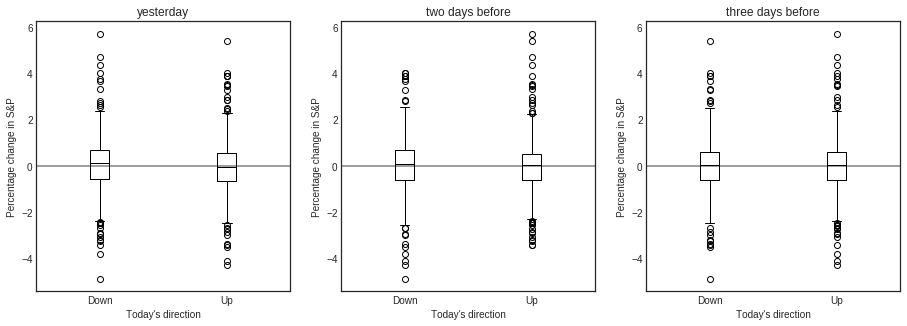

In [81]:
# =======
# plot previous day's percentage change in the S&P index for the days for which the market increased or decreased: Figure 1.2

title = ['yesterday', 'two days before', 'three days before']
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for axis, ii in zip([0, 1, 2], ['Lag1', 'Lag2', 'Lag3']):
    ax[axis].axhline(y=0, color='gray')
    df_smarket.boxplot(by ='Direction', column =[ii], color='black', grid=False, ax=ax[axis])
    ax[axis].set_title(title[axis])
    ax[axis].set_xlabel("Today's direction")
    ax[axis].set_ylabel("Percentage change in S&P")
plt.suptitle('') # removing pandas boxplot generated title

### Clustering
Looking for similarities, groups or cluster in data

Let's look at the NCI60 data set: 6830 gene expression measurements for each of 64 cancer cell lines

In [82]:
# =======
# reade data set using pandas
df_genes = pd.read_csv('../data/nci60_data.csv', index_col=0)

# returns the first 10 rows
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


6830 gene expression measurements per line....this is hard do visualize!  

We can reduce the number of dimensions using a statistical procedure called [**Principal component analysis (PCA)**](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [83]:
# =======
# import module
from sklearn.decomposition import PCA

# =======
# Performe PCA on data

# define number of components
pca = PCA(n_components = 2)       # here, we use the first two components, which explain most of the variance
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

# How much of the variance do the first two principal compoenents explain?
print("The first two PC explain ", pca.explained_variance_ratio_)
print(pca.singular_values_)

The first two PC explain  [0.14892938 0.08300699]
[199.73127562 149.11221385]


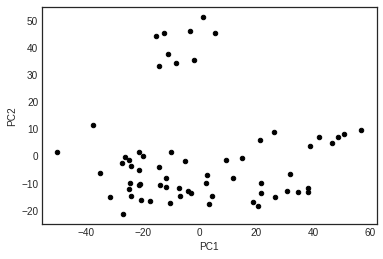

In [84]:
# =======
# plot the 64 cancer cell lines in a two-dimensional space PC1 and PC2
df_genes_transformed.plot.scatter(x='PC1',
                                  y='PC2',
                                  c='black')

We can now cluster the 64 cancer cell lines using the first two principle components.

For this, we are using the method [**KMeans**](https://en.wikipedia.org/wiki/K-means_clustering).

In [85]:
# =======
# import module
from sklearn.cluster import KMeans

# =======
# Performe k-means clustering on data

# define number of clusters
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_genes_transformed)
df_genes_transformed['cluster'] = kmeans.labels_

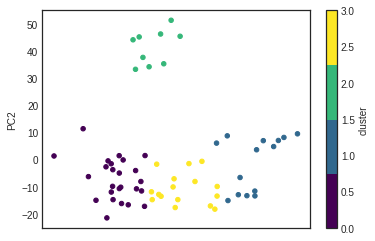

In [86]:
# =======
# plot the 64 cancer cell lines in a two-dimensional space PC1 and PC2 and color them according to their cluster
df_genes_transformed.plot.scatter(x='PC1',
                      y='PC2',
                      c='cluster',
                      colormap=plt.get_cmap('viridis', 4))
